In [180]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sys

In [181]:
seed = 70
model_weights = '/home/kuba/projects/puff/paper00/experiments/old/04session-split00/runs/same_config_run/3/best_dev_model.pt'
model_def = '/home/kuba/projects/puff/paper00/unet.py'
data_path = '/home/kuba/projects/puff/paper00/experiments/old/04session-split00/data/test.pt'

In [182]:
X, y = torch.load(data_path, weights_only=True)

In [183]:
X[0].shape

torch.Size([6, 1024])

In [184]:
def viz(i, data, to_transpose=True):
    to_plot = torch.hstack((data[i], data[i+1]))
    print(to_plot.shape)
    if to_transpose:
        plt.plot(to_plot.T);
    else:
        plt.plot(to_plot);
    plt.vlines(x=1024, ymin=-10, ymax=10, linestyles='--', colors='black', alpha=0.18)
    plt.show();

In [185]:
len(X)

14102

In [186]:
#now can we un-shuffle this
np.random.seed(seed)
perm_idx = np.random.permutation(len(X))
reverse =  np.empty_like(perm_idx)
reverse[perm_idx] = np.arange(len(perm_idx))

In [187]:
X_fixed = X[reverse]
y_fixed = y[reverse]

In [188]:
X[:,:3].shape

torch.Size([14102, 3, 1024])

torch.Size([3, 2048])


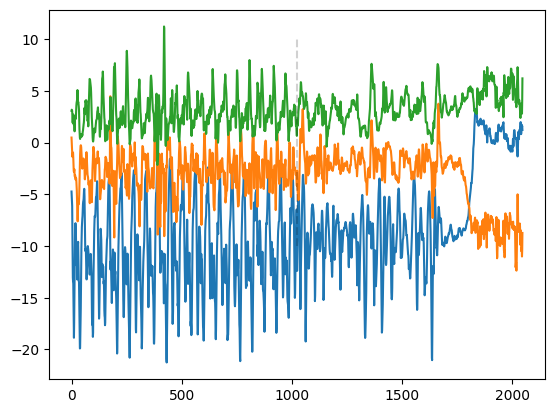

torch.Size([3, 2048])


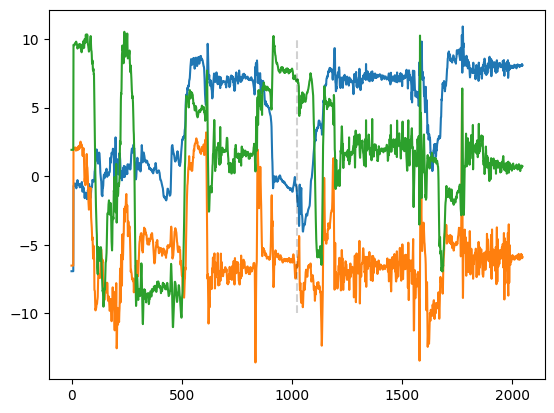

In [189]:
i = 91
viz(i, X[:,:3])
viz(i, X_fixed[:,:3])

In [190]:
sum(y_fixed[91] == 1)

tensor(265)

torch.Size([2048])


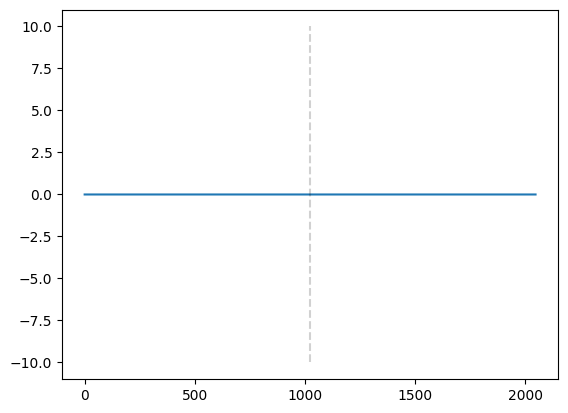

torch.Size([2048])


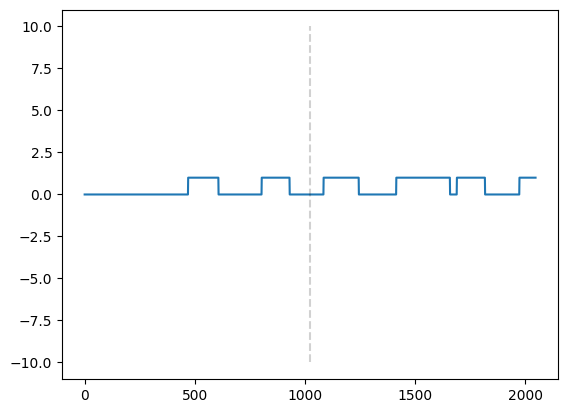

In [191]:
i = 91
viz(i, y, to_transpose=False)
viz(i, y_fixed, to_transpose=False)

In [192]:
torch.where(y_fixed.sum(axis=1) > 0)

(tensor([   91,    92,    93,    94,    95,    96,    97,    98,    99,   100,
           101,   102,   103,   104,   105,   106,   107,   108,   109,   110,
           302,   303,   304,   305,   306,   307,   308,   309,   310,   311,
           312,  1054,  1055,  1056,  1057,  1058,  1059,  1061,  1062,  1063,
          1064,  1065,  1545,  1546,  1547,  1548,  1549,  1550,  1551,  1552,
          1553,  1554,  1555,  1556,  1557,  1558,  1559,  1560,  1561,  1562,
          1588,  1589,  1590,  1591,  1592,  1593,  1594,  1595,  1596,  1597,
          1598,  1599,  1600,  1601,  1602,  1603,  1838,  1839,  1840,  1841,
          1842,  1843,  1844,  1845,  1846,  1847,  1848,  2720,  2721,  2722,
          2723,  2724,  2725,  2726,  2727,  2728,  2729,  2730,  2974,  2975,
          2976,  2977,  2978,  2979,  2980,  2981,  2982,  2983,  3342,  3343,
          3344,  3345,  3346,  3347,  3348,  3349,  3350,  3351,  3885,  3886,
          3887,  3888,  3889,  3890,  3891,  3892,  

In [193]:
# Add  the model def to the path to import the class
module_path, file_name = model_def.rsplit('/', 1)
file_prefix = file_name.split('.')[0]
module_path, file_prefix

('/home/kuba/projects/puff/paper00', 'unet')

In [194]:
sys.path.append(module_path)
module = importlib.import_module(file_prefix)
model_class = getattr(module, 'Model')

#add an needed specifications
model_obj = model_class()

In [195]:
model_obj.load_state_dict(torch.load(model_weights, weights_only=True))

<All keys matched successfully>

In [196]:
model_obj.eval()
with torch.no_grad():
    output = model_obj(X_fixed[90:100])

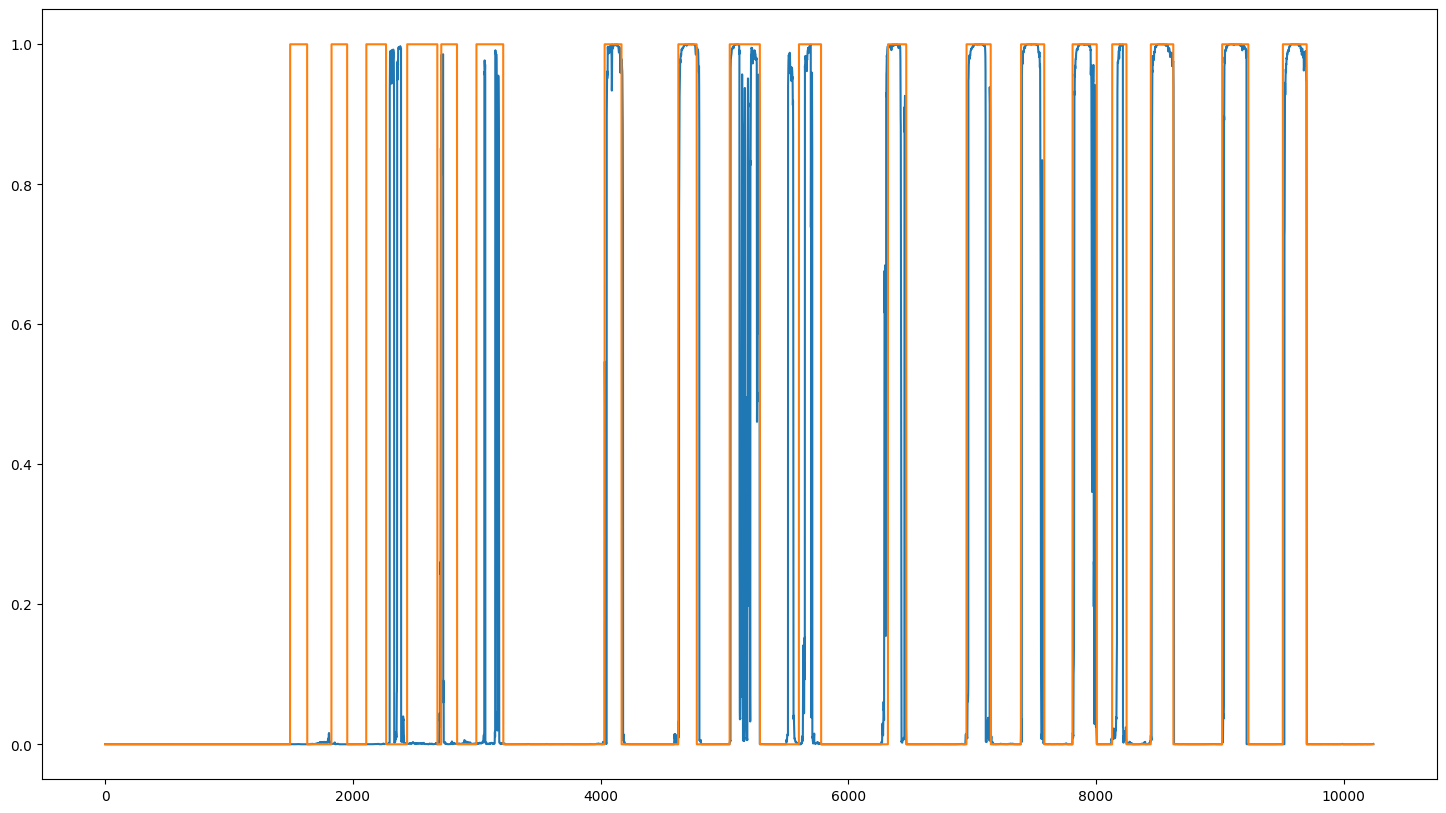

In [197]:
plt.figure(figsize=(18,10))
plt.plot(torch.sigmoid(output.flatten()));
plt.plot(y_fixed[90:100].flatten());

In [198]:
thresh_pred = (torch.sigmoid(output.flatten()) > 0.8).long()

In [203]:
from scipy.ndimage import binary_closing

# Apply after sigmoid and thresholding
closed_thresh_pred = binary_closing(thresh_pred, structure=np.ones(100)) - 0.004


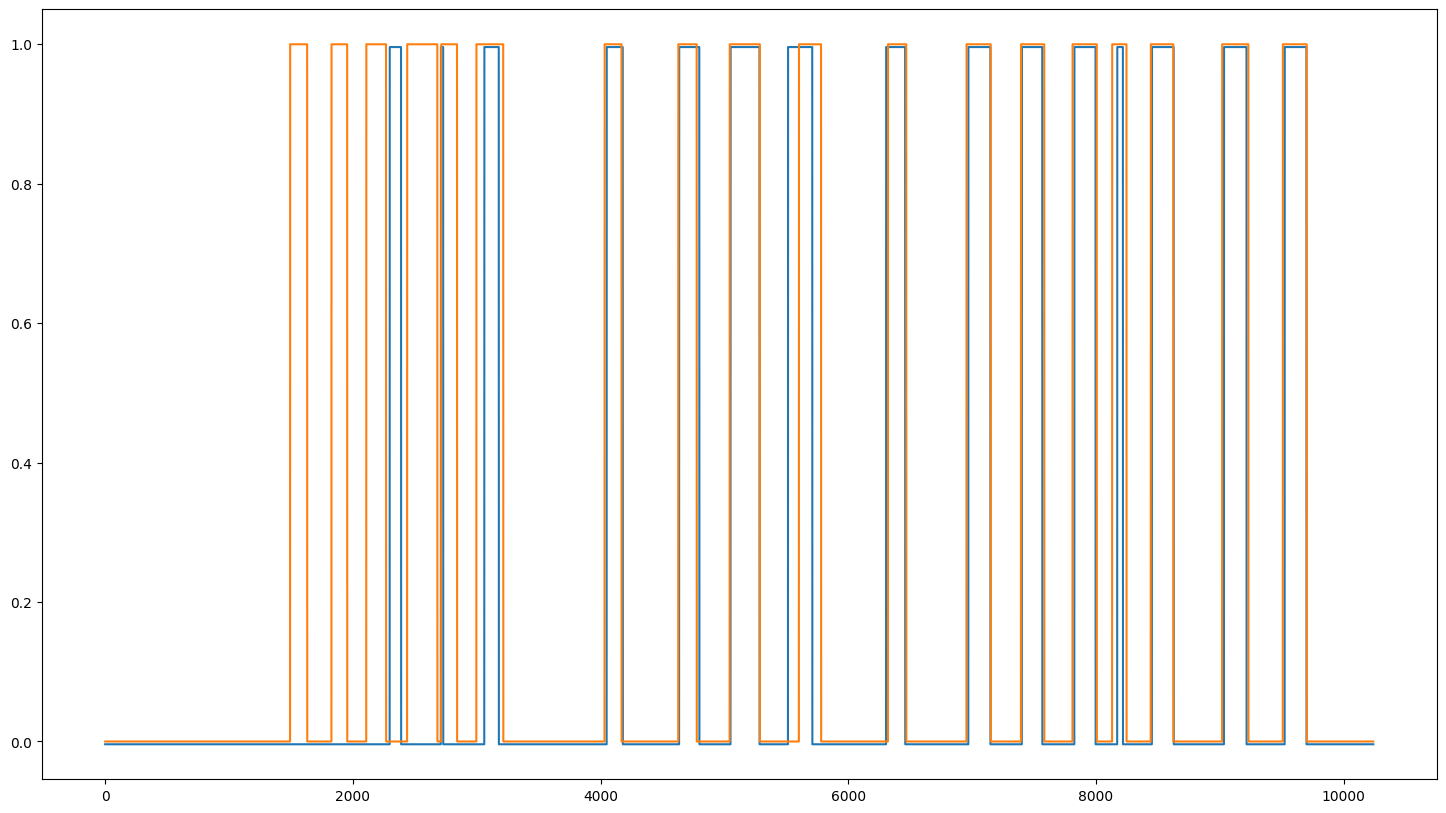

In [204]:
plt.figure(figsize=(18,10))
plt.plot(closed_thresh_pred);
plt.plot(y_fixed[90:100].flatten());